In [2]:
## Q1 ##

In [14]:
c1 = [[3.1, 43.5], [4.7, 25.0]]
c2 = [[3.0, 44.5], [4.8, 25.1]]
print(c1)

[[3.1, 43.5], [4.7, 25.0]]


In [40]:
import numpy as np
def R0_value(g11, g12, g21, g22):
    R0 = ((g11 + g22) + np.sqrt((g11+g22)**2 - 4 * (g11*g22 - g12*g21))) / 2
    return R0
#R0 = R0_value(1.5, 0, 0, 1)
#print(R0)
R0_Pemic = R0_value(3.1, 43.5, 4.7, 25.0)
R0_Uenza = R0_value(3.0, 44.5, 4.8, 25.1)
print(R0_Pemic) #32.059789004871774
print(R0_Uenza) #32.37218600495039

32.059789004871774
32.37218600495039


In [50]:
## Q2 ##

In [41]:
# For all groups
import numpy as np
from scipy import linalg 
import matplotlib.pyplot as plt
# For 1 generation: 
s0 = 0.999 / 4
i0 = 0.001 / 4
r0 = 0

p1 = 1
p2 = 2
p3 = 3
p4 = 4
gamma = 3
R0 = 1.5
c = 0.451
omega = 1/4

totS = []
totS.append(s0)
totI = []
totI.append(i0)
totR = []
totR.append(r0)

deltaT = 0.1
i = 0
totS = np.array([[s0, s0, s0, s0]])
totI = np.array([[i0, i0, i0, i0]])
T = [0]
p = [(p1*totS[-1, 0] + p2*totS[-1, 1] + p3*totS[-1, 2] + p4*totS[-1, 3]) / (totS[-1, 0] + totS[-1, 1] + totS[-1, 2] + totS[-1, 3])]

while i < 100:   
    snew_1 = totS[-1, 0] + deltaT * (- p1 * totS[-1, 0] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]))
    inew_1 = totI[-1, 0] + deltaT * (p1 * totS[-1, 0] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]) - gamma * totI[-1, 0])
    snew_2 = totS[-1, 1] + deltaT * (- p2 * totS[-1, 1] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]))
    inew_2 = totI[-1, 1] + deltaT * (p2 * totS[-1, 1] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]) - gamma * totI[-1, 1])
    snew_3 = totS[-1, 2] + deltaT * (- p3 * totS[-1, 2] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]))
    inew_3 = totI[-1, 2] + deltaT * (p3 * totS[-1, 2] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]) - gamma * totI[-1, 2])
    snew_4 = totS[-1, 3] + deltaT * (- p4 * totS[-1, 3] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]))
    inew_4 = totI[-1, 3] + deltaT * (p4 * totS[-1, 3] * c * omega**(-1) * (totI[-1, 0] + totI[-1, 1] + totI[-1, 2] + totI[-1, 3]) - gamma * totI[-1, 3])
    
    snew = np.array([[snew_1, snew_2, snew_3, snew_4]])
    inew = np.array([[inew_1, inew_2, inew_3, inew_4]])

    totS = np.append(totS, snew, axis = 0)
    totI = np.append(totI, inew, axis = 0)
    i = i + 1
    T.append(i)
    p.append((p1*totS[-1, 0] + p2*totS[-1, 1] + p3*totS[-1, 2] + p4*totS[-1, 3]) / (totS[-1, 0] + totS[-1, 1] + totS[-1, 2] + totS[-1, 3]))
#print(totS, totI)

Text(0, 0.5, 'Population Proportion')

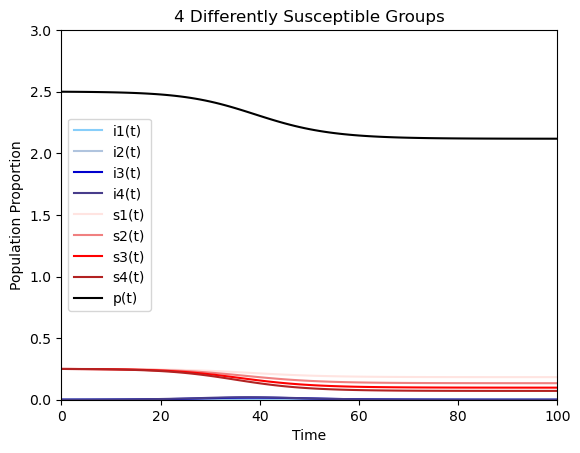

In [44]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(T, totI[:, 0], color = 'lightskyblue', label = 'i1(t)')
ax.plot(T, totI[:, 1], color = 'lightsteelblue', label = 'i2(t)')
ax.plot(T, totI[:, 2], color = 'mediumblue', label = 'i3(t)')
ax.plot(T, totI[:, 3], color = 'darkslateblue', label = 'i4(t)')

ax.plot(T, totS[:, 0], color = 'mistyrose', label = 's1(t)')
ax.plot(T, totS[:, 1], color = 'lightcoral', label = 's2(t)')
ax.plot(T, totS[:, 2], color = 'red', label = 's3(t)')
ax.plot(T, totS[:, 3], color = 'firebrick', label = 's4(t)')

ax.plot(T, p, color = 'black', label = 'p(t)')

ax.axis([0, 100, 0, 3])
ax.legend()
plt.title('4 Differently Susceptible Groups')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

In [2]:
## Q3 ##

Text(0, 0.5, 'Quantity')

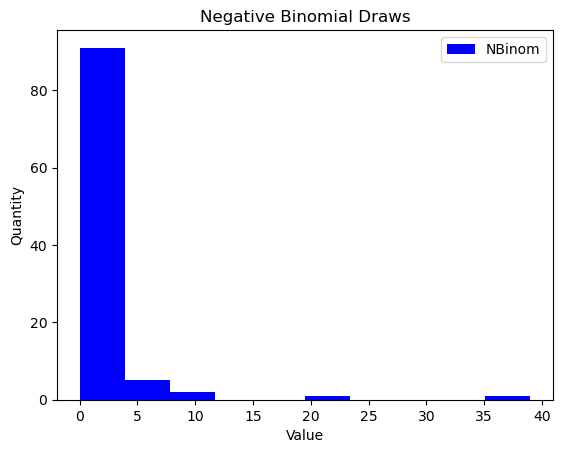

In [49]:
from scipy.stats import nbinom
import numpy as np
import matplotlib.pyplot as plt

k = 0.1 # dispersion parameter k
R0 = 3 # mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = (mean**2) / (variance - mean)

draw = nbinom.rvs(n=n, p=p)
draws = nbinom.rvs(n=n, p=p, size=100)

#print(draws)
fig,ax = plt.subplots()
ax.hist(draws, bins = 10, color = 'blue', label = 'NBinom')
ax.legend()
plt.title('Negative Binomial Draws')
ax.set_xlabel('Value') 
ax.set_ylabel('Quantity')

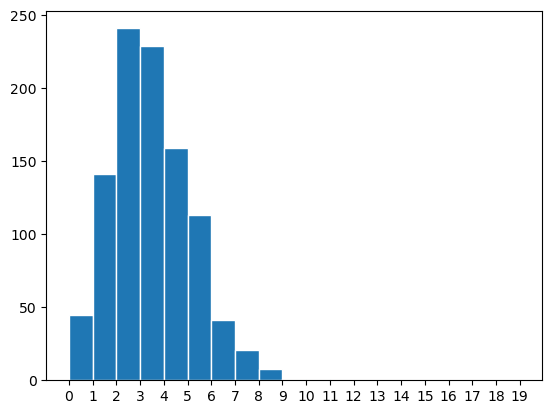

In [108]:
import numpy as np
import matplotlib.pyplot as plt
#initialize the list z which shows num of infections per generation
z_0 = 1 #num of infections we start with (initial)
z = []

z.append(z_0)
R0 = 3
#draw the number of infections in gen 1:
#Assumption: the num of children generated by each parent is Pois(R0) 
for i in range(z_0): #draw from poisson for each person in z_0 and add up all draws & store num in Z vector that counts number of infections
    #z_1 = np.random.poisson(R0) #drawing from poisson:
    #fig,ax = plt.subplots()
    #draws = np.random.poisson(R0, size = 1000)
    #ax.hist(draws, bins = np.arange(0,20), edgecolor='white')
    #ax.set_xticks(np.arange(0,20))

    # z vec captures infections in each generation, where each element is the number of infections in a generation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom 

def BranchingPois(R0, totGens):
    z_0= 1
    z = []
    z.append(z_0)
    for G in range(totGens):
        totNum = 0
        if z[-1] == 0:
            return 0
        for item in range(z[-1]):
            new = np.random.poisson(R0)
            totNum = totNum + new
        z.append(totNum)
    return 1
ans = []
sum = 0
i = 0
while i < 10:
    ans.append(BranchingPois(1, 10))
    i = i + 1
    sum = sum + ans[-1]
print(ans)
print(sum)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
2


In [58]:
import numpy as np
import matplotlib.pyplot as plt

def BranchingnBinom(R0, k, totGens):
    z_0= 1
    z = []
    z.append(z_0)
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = (mean**2) / (variance - mean)
    
    for G in range(totGens):
        totNum = 0
        if z[-1] == 0:
            return 0
        for item in range(z[-1]):
            new = nbinom.rvs(n=n, p=p)
            totNum = totNum + new
        z.append(totNum)
    return 1

ans_k1 = []
sum_k1 = 0
ans_k2 = []
sum_k2 = 0
ans_k3 = []
sum_k3 = 0
ans_k4 = []
sum_k4 = 0
ans_k5 = []
sum_k5 = 0

i = 0
while i < 50:
    ans_k1.append(BranchingnBinom(3, 0.1, 10))
    sum_k1 = sum_k1 + ans_k1[-1]
    ans_k2.append(BranchingnBinom(3, 0.5, 10))
    sum_k2 = sum_k2 + ans_k2[-1]
    ans_k3.append(BranchingnBinom(3, 1.0, 10))
    sum_k3 = sum_k3 + ans_k3[-1]
    ans_k4.append(BranchingnBinom(3, 5.0, 10))
    sum_k4 = sum_k4 + ans_k4[-1]
    ans_k5.append(BranchingnBinom(3, 10.0, 10))
    sum_k5 = sum_k5 + ans_k5[-1]
    i = i + 1

q1 = 1 - sum_k1 / 50
q2 = 1 - sum_k2 / 50
q3 = 1 - sum_k3 / 50
q4 = 1 - sum_k4 / 50
q5 = 1 - sum_k5 / 50
print(q1, q2, q3, q4, q5)

0.8 0.07999999999999996 -0.3600000000000001 -0.56 -0.76


Values of q (rounded to 3 decimal places):
- When i < 10: 0.700, 0.400, 0.400, 0.200, 0.200
- When i < 25: 0.880, 0.480, 0.200, 0.120, 0.120
- When i < 50: 0.900, 0.540, 0.320, 0.220, 0.120